In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

In [2]:
def get_displacement(mu, dtau, m0):
    
    r = ((7*m0)/(16*dtau))**(1./3.)

    d = m0 / (mu*r**2 * np.pi)
    
    # Alternatively:
    # od = np.pi * mu * r * (7/(16*dtau*m0**2))**(1./3.)
    # d = 1 / od
    return r, d

In [4]:
# Parameters
dtau = np.arange(1,11)*1e6 # shear stress reduction 
m0 = np.array([3.2e10, 1.0e12, 3.2e13]) # seismic moment
mu = 2.5e10 # shear modulus

In [5]:
# calculate displacements and radius
displacements = np.concatenate([get_displacement(mu, x, m0) for x in dtau]) 

# seperate arrays
disps = displacements[1::2,:]
rads = displacements[0::2,:]

# min tau and max tau
mitau = np.polyfit(disps[0,:], rads[0,:],1)
matau = np.polyfit(disps[-1,:], rads[-1,:],1)

dsim = np.linspace(0,0.033)
mirad = mitau[0]*dsim+mitau[1]
marad = matau[0]*dsim+matau[1]

Text(0, 0.5, 'influenced radius [m]')

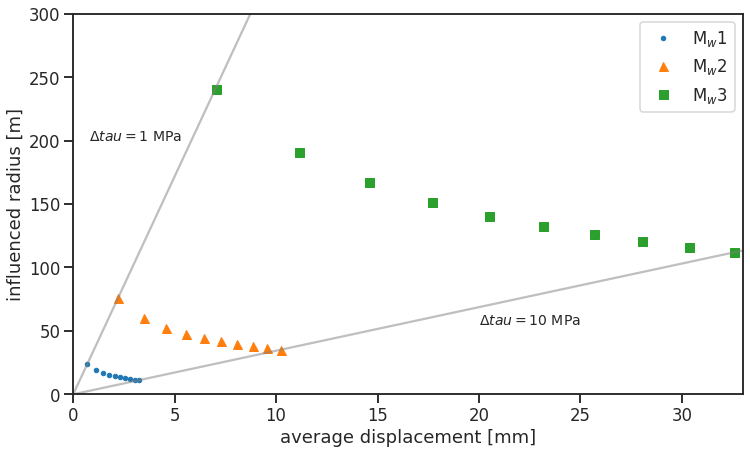

In [6]:
# plot results
fig = plt.figure(figsize=[12,7])
plt.plot(disps[:,0]*1000, rads[:,0], '.', label='M$_w$1')
plt.plot(disps[:,1]*1000, rads[:,1], '^', label='M$_w$2')
plt.plot(disps[:,2]*1000, rads[:,2], 's', label='M$_w$3')

plt.plot(dsim*1000, mirad, '-', color='gray', alpha=.5)
plt.plot(dsim*1000, marad, '-', color='gray', alpha=.5)
plt.legend()

plt.ylim([0, 300])
plt.xlim([0, 0.033*1000])

plt.text(.8, 200, '$\Delta tau = 1$ MPa', fontsize=14)
plt.text(20, 55, '$\Delta tau = 10$ MPa', fontsize=14)

plt.xlabel('average displacement [mm]')
plt.ylabel('influenced radius [m]')
#fig.savefig('displacement_radius.png', dpi=300, bbox_inches='tight')